In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [11]:
df.isna().values.any()

True

In [12]:
df.dropna(inplace=True)

In [14]:
df.isna().values.any()

False

In [16]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,388.149457,439.239130,69.877717,78.247283,76.184783,73.603261,72.953804,68.372283,3.461957
std,218.947562,111.449515,23.470864,29.874966,30.857033,30.626611,27.624389,26.869652,1.660133
min,1.000000,190.000000,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000
25%,205.500000,345.000000,52.750000,55.000000,51.500000,50.000000,53.500000,50.000000,2.000000
50%,393.500000,460.000000,68.000000,77.000000,71.500000,69.500000,70.000000,69.500000,4.000000
75%,582.250000,515.000000,85.000000,95.000000,91.000000,95.000000,90.000000,90.000000,5.000000
max,742.000000,700.000000,150.000000,170.000000,230.000000,170.000000,230.000000,160.000000,6.000000


In [17]:
df.min()

,0
#,1
Name,Abomasnow
Type 1,Bug
Type 2,Bug
Total,190
HP,1
Attack,10
Defense,15
Sp. Atk,10
Sp. Def,20


In [21]:
df['HP'].min()

1

In [19]:
df['HP'].idxmin()

290

In [22]:
df.loc[290]

,290
#,291
Name,Shedinja
Type 1,Bug
Type 2,Ghost
Total,236
HP,1
Attack,90
Defense,45
Sp. Atk,30
Sp. Def,30


In [23]:
df['HP'].max()

150

In [24]:
df['HP'].idxmax()

429

In [25]:
df.loc[429]

,429
#,430
Name,Drifblim
Type 1,Ghost
Type 2,Flying
Total,498
HP,150
Attack,80
Defense,44
Sp. Atk,90
Sp. Def,54


In [28]:
type_poke = df.groupby('Type 2').agg({'HP': pd.Series.count})
type_poke.head()

,HP
Type 2,
Bug,3
Dark,17
Dragon,15
Electric,6
Fairy,18


In [30]:
type_poke.values

array([[ 3],
       [17],
       [15],
       [ 6],
       [18],
       [21],
       [10],
       [91],
       [13],
       [19],
       [31],
       [13],
       [ 4],
       [31],
       [28],
       [14],
       [20],
       [14]])

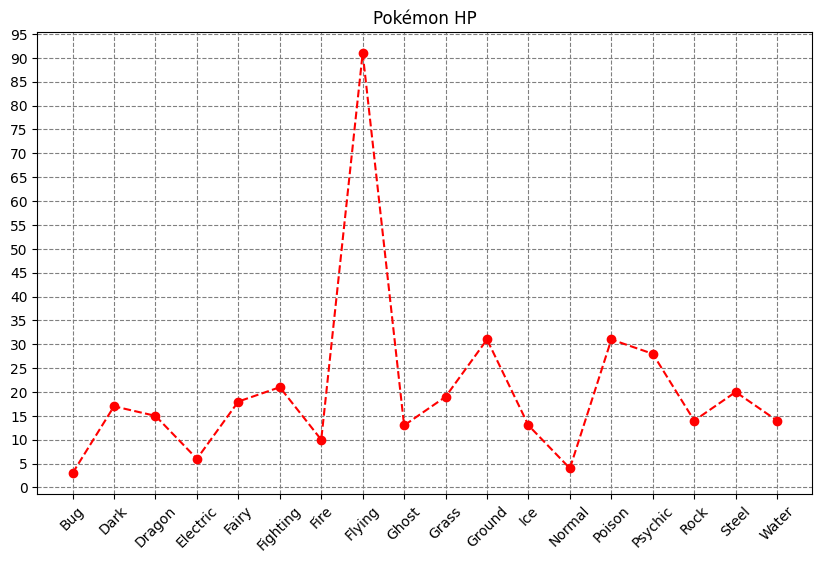

In [169]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(0, 100, step=5))
plt.title('Pokémon HP')
plt.grid(color='grey', linestyle='--')

plt.plot(type_poke.index, type_poke.values, color='red', linestyle='--', marker='o')

In [83]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [86]:
legendary = df.Legendary.value_counts()
legendary

,count
Legendary,
False,334
True,34


<BarContainer object of 2 artists>

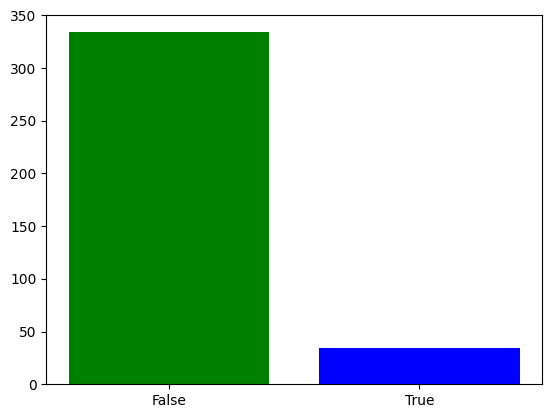

In [149]:
plt.xticks(legendary.index, labels=['False', 'True'])

color = ['green', 'blue']

plt.bar(legendary.index, legendary.values, color=color)

In [159]:
generation = df['Generation'].value_counts()
generation

,count
Generation,
5,81
1,67
3,66
4,62
2,49
6,43


In [168]:
box = px.bar(x=generation.index, y=generation.values, hover_name=generation, color=generation.index, color_continuous_scale='portland')

box.update_layout(xaxis_title='Generations', yaxis_title='Number of pokémons', coloraxis_showscale=False)

box.show()

In [170]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
11,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False


In [187]:
# What can I do with scikit-learn with a pokemon csv file?

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['Attack', 'Defense', 'Speed']]
y = df['HP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 428.87667609699633
